# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## General Analysis

In [2]:
path = 'https://raw.githubusercontent.com/Ly-Ax/RetailML/eda/data/raw/coffee_shop_sales.csv'

df = pd.read_csv(path)
df.sample(3)

,transaction_id,transaction_date,transaction_time,store_location,product_category,product_type,product_detail,product_size,unit_price,quantity,total_bill
139826,142892,25/06/2023,08:30:27,Lower Manhattan,Coffee,Gourmet brewed coffee,Ethiopia,Regular,3.00,2,6.0
69655,149080,30/06/2023,11:42:44,Lower Manhattan,Coffee beans,House blend Beans,Our Old Time Diner Blend,Not Defined,18.00,1,18.0
90379,33600,28/02/2023,16:42:15,Lower Manhattan,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Regular,2.55,2,5.1


In [3]:
print(df.shape)

(149116, 11)


In [4]:
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
store_location       object
product_category     object
product_type         object
product_detail       object
product_size         object
unit_price          float64
quantity              int64
total_bill          float64
dtype: object

In [5]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_location      0
product_category    0
product_type        0
product_detail      0
product_size        0
unit_price          0
quantity            0
total_bill          0
dtype: int64

In [6]:
df.nunique()

transaction_id      149116
transaction_date       181
transaction_time     25762
store_location           3
product_category         9
product_type            29
product_detail          45
product_size             4
unit_price              41
quantity                 6
total_bill              75
dtype: int64

In [7]:
df.describe()

,transaction_id,unit_price,quantity,total_bill
count,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,3.382219,1.438276,4.686367
std,43153.600016,2.658723,0.542509,4.227099
min,1.000000,0.800000,1.000000,0.800000
25%,37335.750000,2.500000,1.000000,3.000000
50%,74727.500000,3.000000,1.000000,3.750000
75%,112094.250000,3.750000,2.000000,6.000000
max,149456.000000,45.000000,8.000000,360.000000


### General Functions

In [8]:
def review_measures(data, col):
    print(f'Mean: {df[col].mean():.2f}')
    print(f'Median: {df[col].median():.2f}')
    print(f'Mode: {df[col].mode()[0]:.2f}\n')

    print(f'Deviation: {df[col].std():.2f}')
    print(f'Minimum: {df[col].min():.2f}')
    print(f'Maximum: {df[col].max():.2f}')
    print(f'Range: {df[col].max() - df[col].min():.2f}')

In [9]:
def plot_timeline(data, dt_var, num_var, title):
    plt.figure(figsize=(10,5))
    sns.set_theme(style='whitegrid')

    sns.lineplot(data=data, x=dt_var, y=num_var, color='g')

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [10]:
def plot_categorical(data, cat_var, num_var, title, rotate=0, orientation='V'):
    sns.set_theme(style='whitegrid')

    if orientation == 'V':
        plt.figure(figsize=(10,5))
        sns.barplot(data=data, x=cat_var, y=num_var,
                    palette='viridis', hue=cat_var, legend=False)

    elif orientation == 'H':
        plt.figure(figsize=(5,10))
        sns.barplot(data=data, x=num_var, y=cat_var,
                    palette='viridis', hue=cat_var, legend=False)

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=rotate)
    plt.show()

In [11]:
def plot_histbox(data, num_var, bins, title):
    plt.figure(figsize=(10,7))
    sns.set_theme(style='whitegrid')

    plt.subplot(2,1,1)
    plt.title(title + ' Histogram')
    sns.histplot(data=data, x=num_var, color='limegreen', bins=bins)
    plt.gca().set_xlabel('')
    plt.gca().set_ylabel('')

    plt.subplot(2,1,2)
    plt.title(title + ' Boxplot')
    sns.boxplot(data=data, x=num_var, color='limegreen')
    plt.gca().set_xlabel('')

    plt.show()

In [12]:
def plot_stackedbar(table, title, rotate=0):
    table.plot(kind='bar', stacked=True, figsize=(10,5), cmap='viridis')

    plt.title(title)
    sns.set_theme(style='darkgrid')

    plt.legend(title='')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=rotate)
    plt.show()

In [13]:
def plot_headmap(table, title):
    plt.figure(figsize=(10, 5))
    sns.heatmap(table, annot=True, fmt='.0f', cmap='viridis', annot_kws={'fontsize': 10})

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [14]:
def plot_scatter(data, x_num, y_num, hue_var, title):
    plt.figure(figsize=(10,5))

    if hue_var == '':
        sns.scatterplot(data=data, x=x_num, y=y_num, color='g', alpha=0.7)
    else:
        sns.scatterplot(data=data, x=x_num, y=y_num, hue=hue_var,
                        palette='viridis', alpha=0.7)

    plt.title(title)
    plt.legend(title='')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [15]:
def plot_qqnorm(data, title):
    plt.figure(figsize=(10, 5))
    stats.probplot(data, dist='norm', plot=plt)

    plt.title(title)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)
    plt.show()

## Univariate Analysis

### transaction_id

In [16]:
num_uni = df['transaction_id'].nunique()
per_uni = num_uni / df.shape[0] * 100

print(f'Unique Values: {per_uni:.2f}%')

Unique Values: 100.00%


### transaction_date

In [17]:
trn_date = pd.to_datetime(df['transaction_date'], format='%d/%m/%Y').dt.date
trn_date = trn_date.value_counts().sort_index().reset_index(name='frequency')

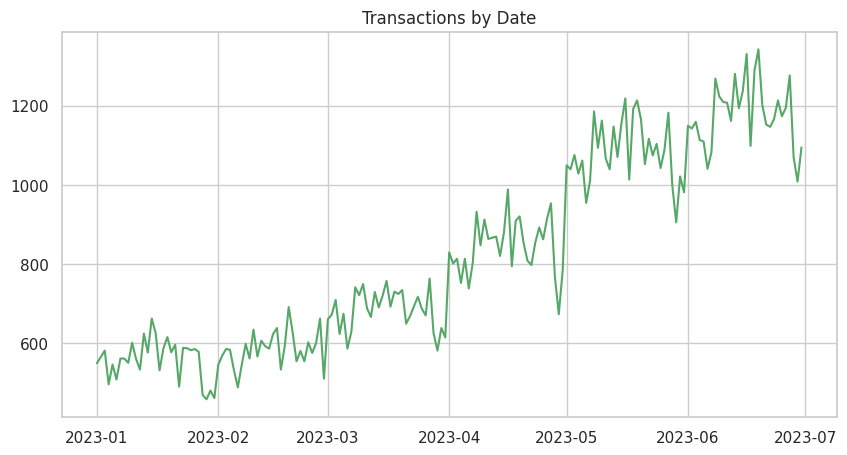

In [18]:
plot_timeline(trn_date, 'transaction_date', 'frequency', 'Transactions by Date')

### transaction_time

In [19]:
trn_time = df['transaction_time'].str.slice(0,2)
trn_time = trn_time.value_counts().sort_index().reset_index(name='frequency')

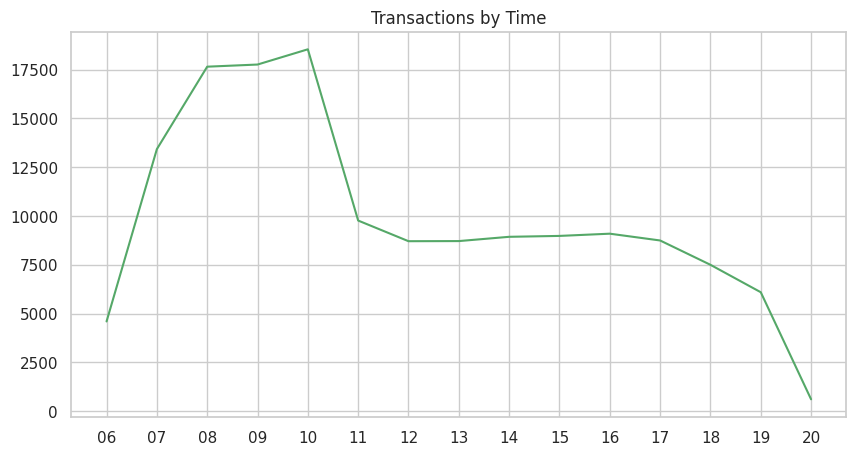

In [20]:
plot_timeline(trn_time, 'transaction_time', 'frequency', 'Transactions by Time')

### store_location

In [21]:
df_store = df['store_location'].value_counts().sort_index().reset_index(name='absolute')
df_store['relative'] = df_store['absolute'] / df_store['absolute'].sum() * 100
df_store

,store_location,absolute,relative
0,Astoria,50599,33.932643
1,Hell's Kitchen,50735,34.023847
2,Lower Manhattan,47782,32.043510


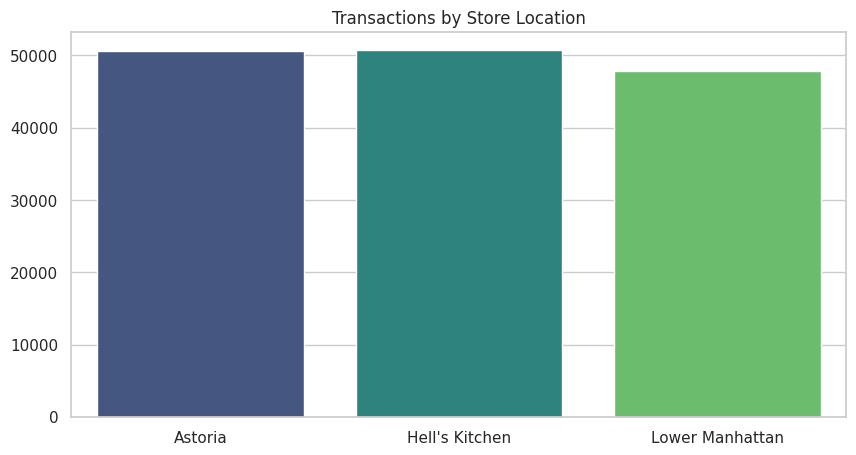

In [22]:
plot_categorical(df_store, 'store_location', 'absolute', 'Transactions by Store Location')

### product_category

In [23]:
df_category = df['product_category'].value_counts().sort_index().reset_index(name='absolute')
df_category['relative'] = df_category['absolute'] / df_category['absolute'].sum() * 100
df_category.head()

,product_category,absolute,relative
0,Bakery,22796,15.287427
1,Branded,747,0.500952
2,Coffee,58416,39.174871
3,Coffee beans,1753,1.175595
4,Drinking Chocolate,11468,7.690657


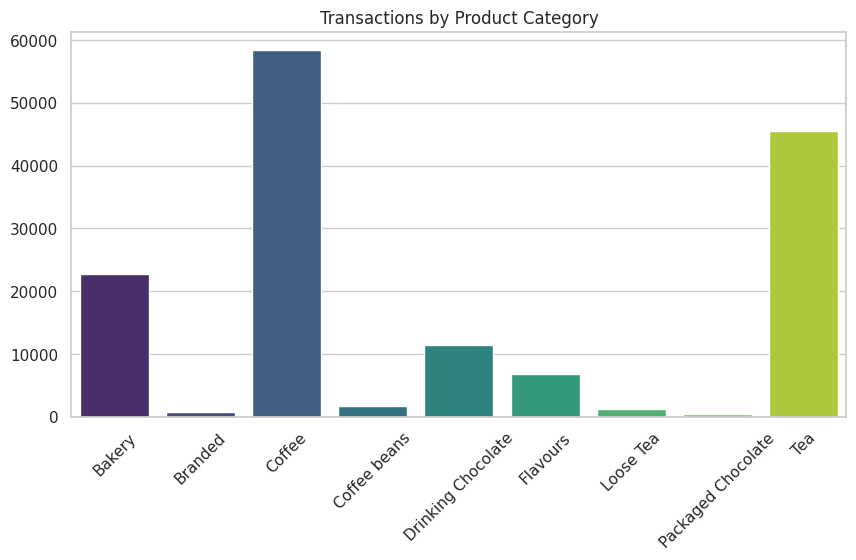

In [24]:
plot_categorical(df_category, 'product_category', 'absolute', 'Transactions by Product Category', 45)

### product_type

In [25]:
df_type = df['product_type'].value_counts().sort_index().sort_index().reset_index(name='absolute')
df_type['relative'] = df_type['absolute'] / df_type['absolute'].sum() * 100
df_type.head()

,product_type,absolute,relative
0,Barista Espresso,16403,11.000161
1,Biscotti,5711,3.829904
2,Black tea,303,0.203198
3,Brewed Black tea,11350,7.611524
4,Brewed Chai tea,17183,11.523244


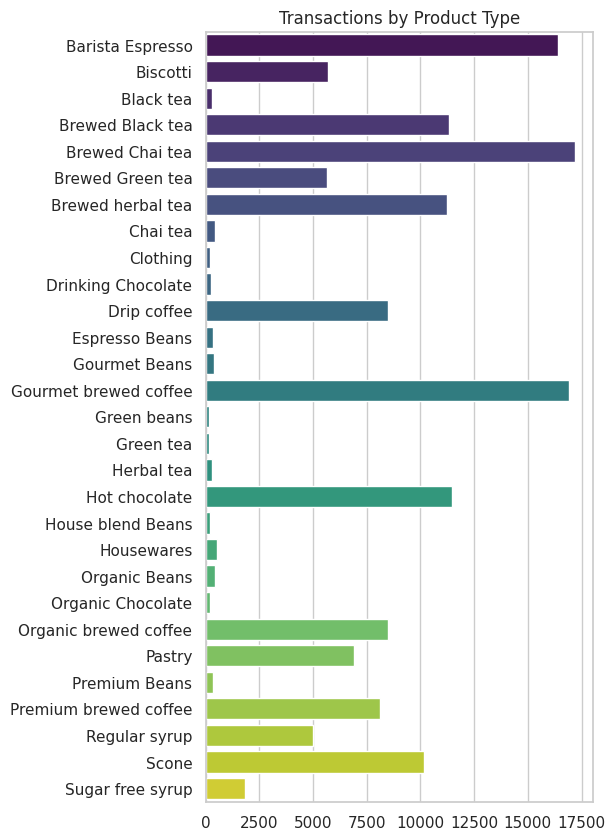

In [26]:
plot_categorical(df_type, 'product_type', 'absolute', 'Transactions by Product Type', orientation='H')

### product_detail

In [27]:
df_product = df['product_detail'].value_counts().sort_index().reset_index(name='absolute')
df_product['relative'] = df_product['absolute'] / df_product['absolute'].sum() * 100
df_product.head()

,product_detail,absolute,relative
0,Almond Croissant,1903,1.276188
1,Brazilian,8489,5.692883
2,Brazilian - Organic,209,0.140159
3,Cappuccino,5565,3.731994
4,Carmel syrup,1725,1.156818


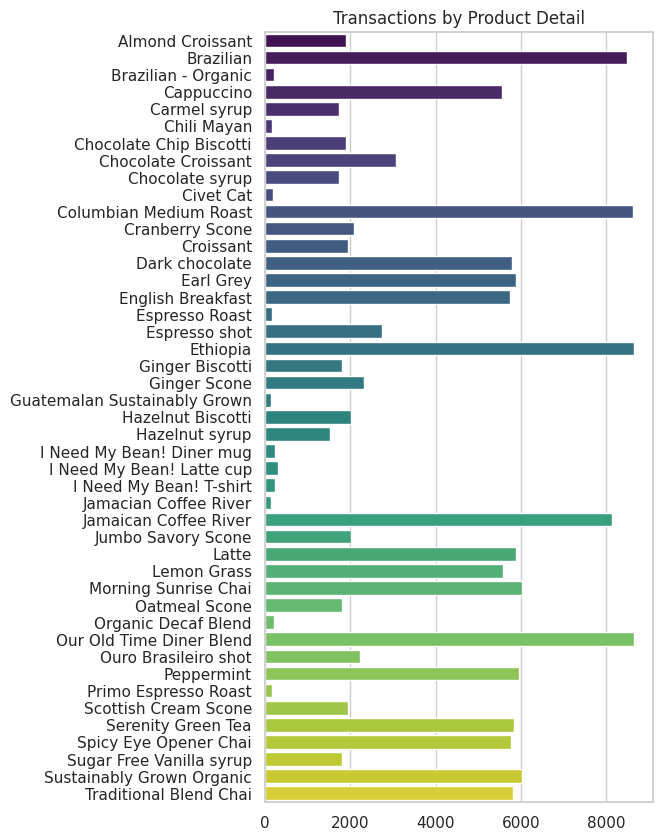

In [28]:
plot_categorical(df_product, 'product_detail', 'absolute', 'Transactions by Product Detail', orientation='H')

### product_size

In [29]:
df_size = df['product_size'].value_counts().sort_index().reset_index(name='absolute')
df_size['relative'] = df_size['absolute'] / df_size['absolute'].sum() * 100
df_size

,product_size,absolute,relative
0,Large,44885,30.100727
1,Not Defined,44518,29.854610
2,Regular,45789,30.706966
3,Small,13924,9.337697


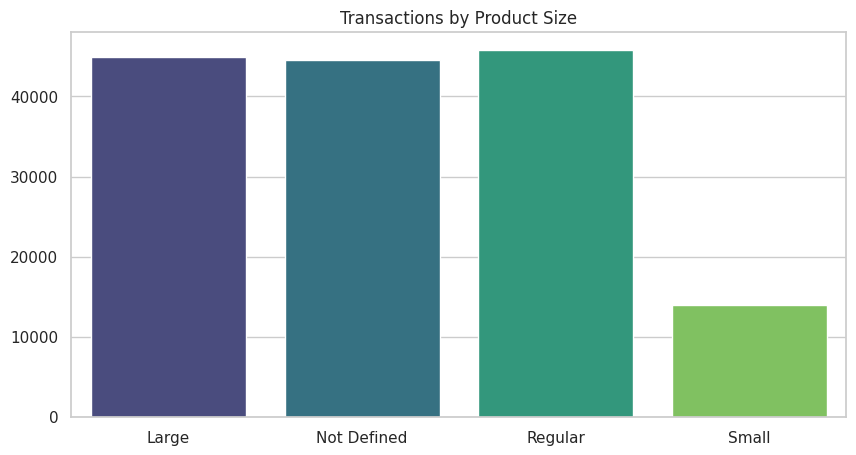

In [30]:
plot_categorical(df_size, 'product_size', 'absolute', 'Transactions by Product Size')

### unit_price

In [31]:
review_measures(df, 'unit_price')

Mean: 3.38
Median: 3.00
Mode: 3.00

Deviation: 2.66
Minimum: 0.80
Maximum: 45.00
Range: 44.20


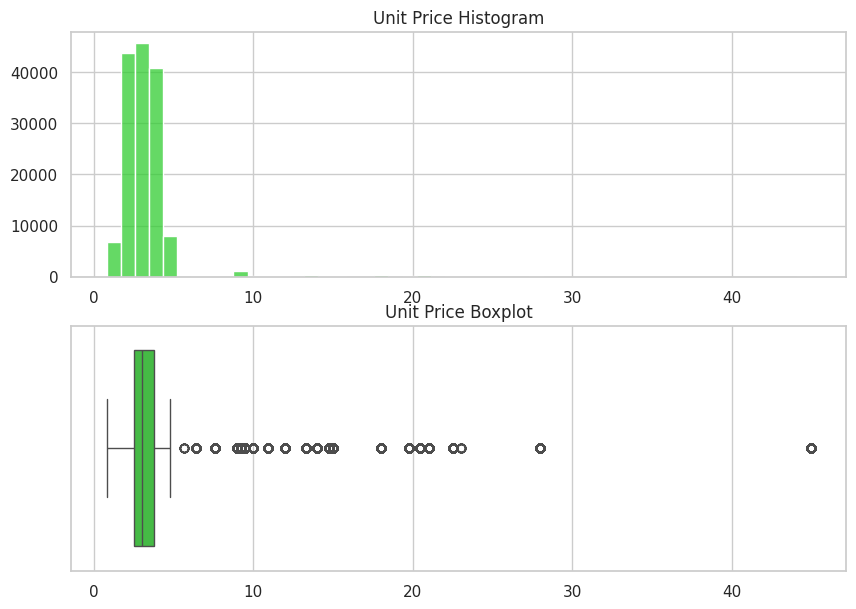

In [32]:
plot_histbox(df, 'unit_price', 50, 'Unit Price')

### quantity

In [33]:
review_measures(df, 'quantity')

Mean: 1.44
Median: 1.00
Mode: 1.00

Deviation: 0.54
Minimum: 1.00
Maximum: 8.00
Range: 7.00


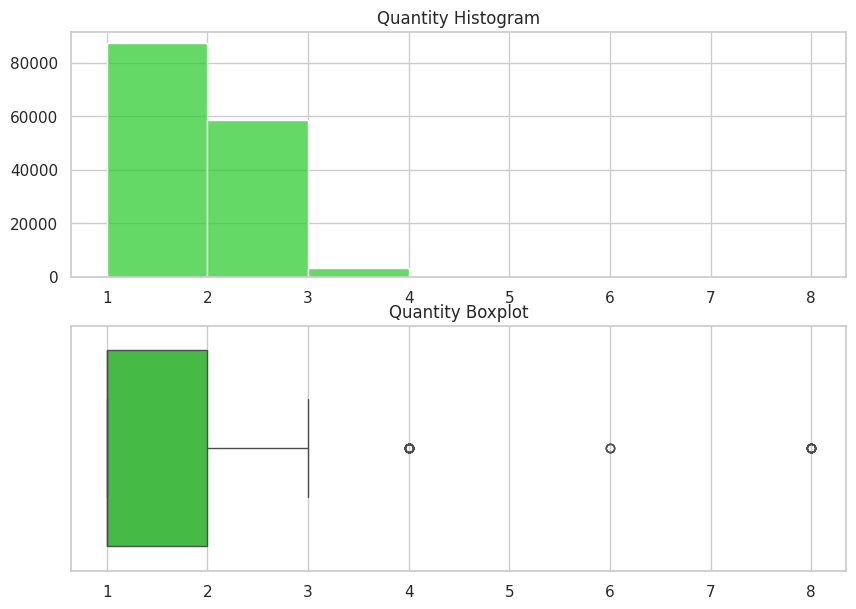

In [34]:
plot_histbox(df, 'quantity', 7, 'Quantity')

### total_bill

In [35]:
review_measures(df, 'total_bill')

Mean: 4.69
Median: 3.75
Mode: 3.00

Deviation: 4.23
Minimum: 0.80
Maximum: 360.00
Range: 359.20


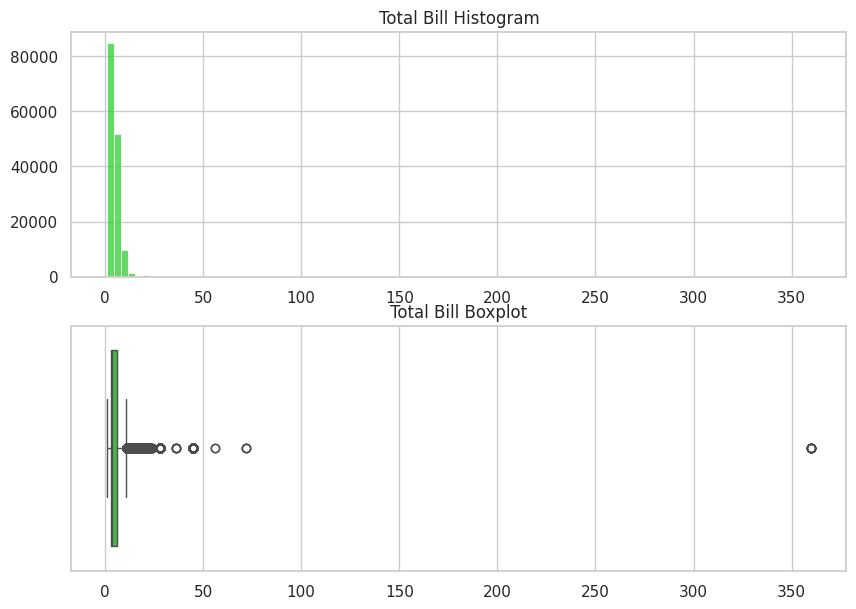

In [36]:
plot_histbox(df, 'total_bill', 100, 'Total Bill')

## Multivariate Analysis

### Sales by Category and Store

In [37]:
sales_table = df.pivot_table(index=['product_category'],
                             columns=['store_location'],
                             values='total_bill',
                             aggfunc='sum')

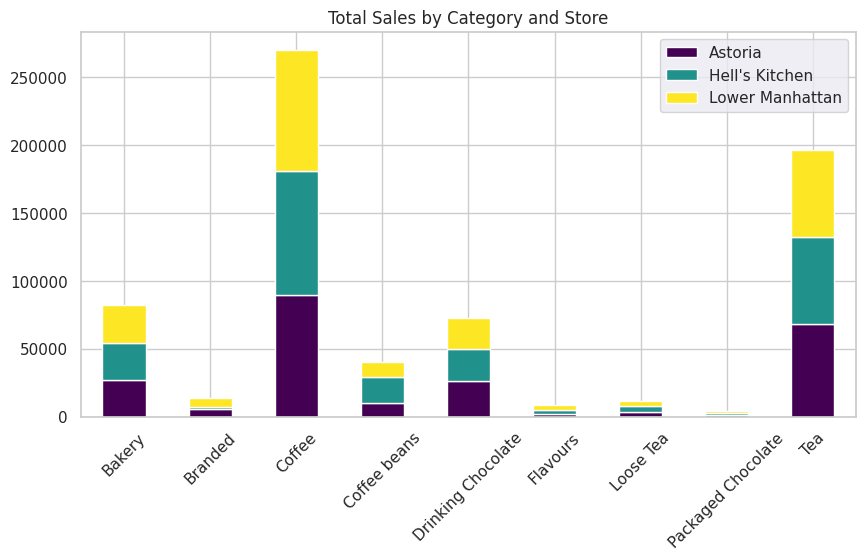

In [38]:
plot_stackedbar(sales_table, 'Total Sales by Category and Store', rotate=45)

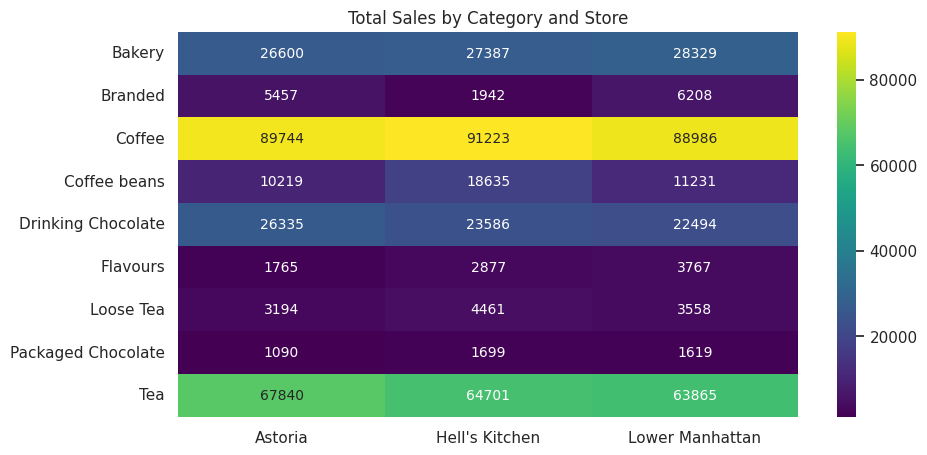

In [39]:
plot_headmap(sales_table, 'Total Sales by Category and Store')

### Total Sales by Date

In [40]:
sales_date = df[['transaction_date','total_bill']].copy()
sales_date['transaction_date'] = pd.to_datetime(sales_date['transaction_date'], format='%d/%m/%Y')

sales_date.columns = ['date', 'sales']
sales_date['year'] = sales_date.date.dt.year
sales_date['month'] = sales_date.date.dt.month
sales_date['day'] = sales_date.date.dt.day
sales_date['weekday'] = sales_date.date.dt.day_name()

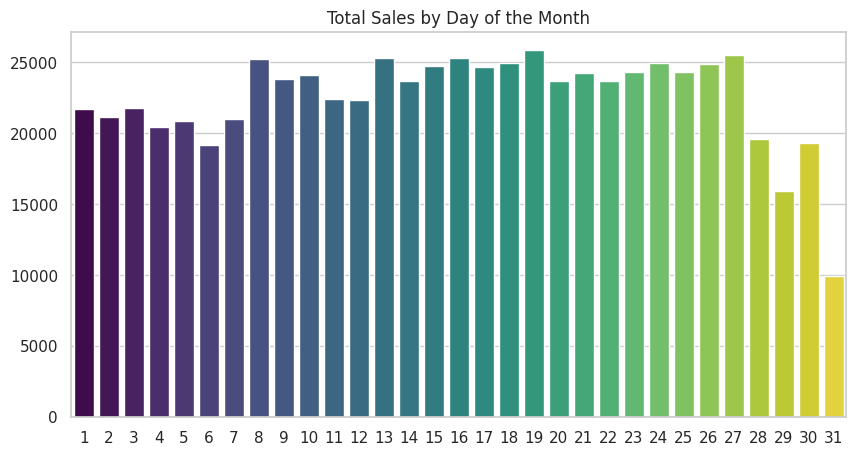

In [41]:
sales_day = sales_date.groupby(['day'])['sales'].sum().reset_index()

plot_categorical(sales_day, 'day', 'sales', 'Total Sales by Day of the Month')

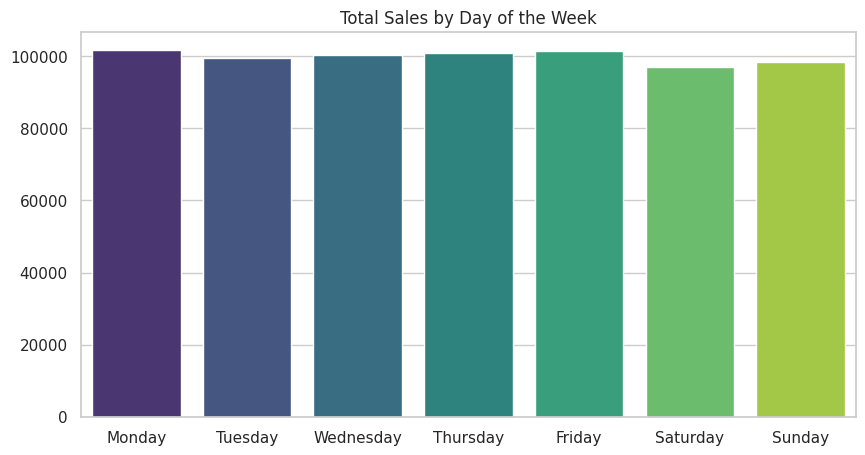

In [42]:
sales_weekday = sales_date.groupby('weekday')['sales'].sum().reset_index()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_weekday['weekday'] = pd.Categorical(sales_weekday['weekday'], categories=days_order, ordered=True)
sales_weekday = sales_weekday.sort_values('weekday')

plot_categorical(sales_weekday, 'weekday', 'sales', 'Total Sales by Day of the Week')

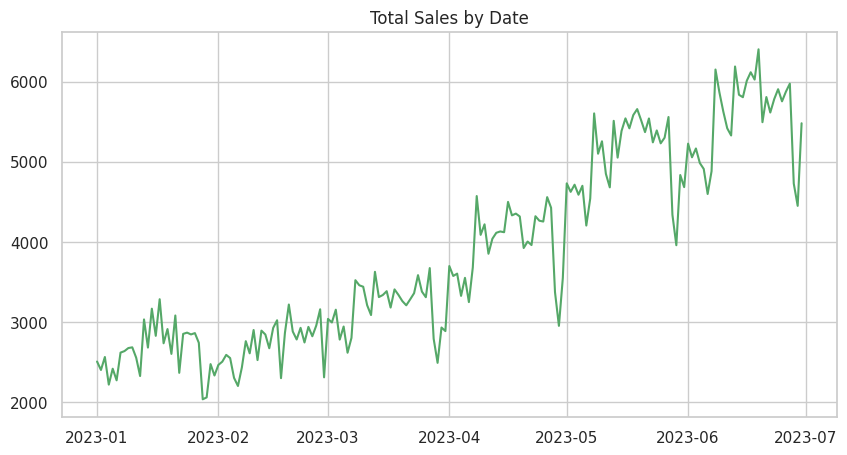

In [43]:
sales_month = sales_date.groupby(['date'])['sales'].sum().reset_index()

plot_timeline(sales_month, 'date', 'sales', 'Total Sales by Date')

### Category, Unit Price and Bill

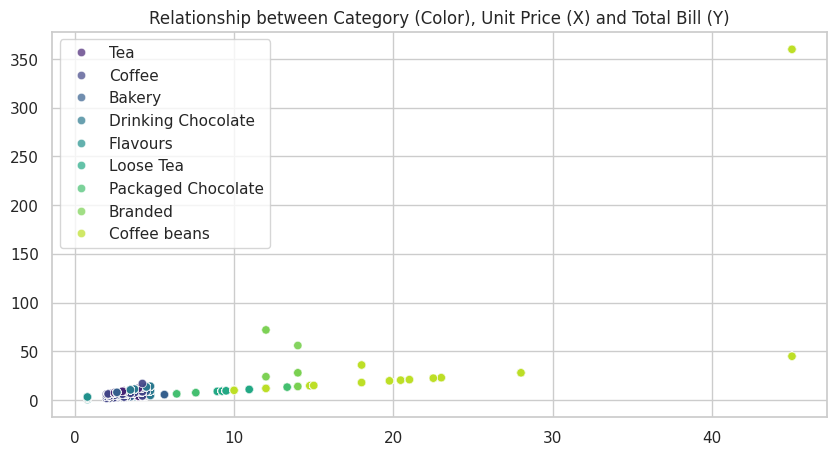

In [44]:
plot_scatter(df, 'unit_price', 'total_bill', 'product_category',
             'Relationship between Category (Color), Unit Price (X) and Total Bill (Y)')

## Hypothesis Testing

- **Null Hypothesis (H0)**: The average sales of "Tea" and “Coffee” are equal.

- **Alternative Hypothesis (H1)**: The average sales of “Tea” and “Coffee” are different.

In [45]:
alpha = 0.05 # Significance Level

tea_sales = df[df['product_category'] == 'Tea']['total_bill'].sample(5000)
coffee_sales = df[df['product_category'] == 'Coffee']['total_bill'].sample(5000)

### Shapiro-Wilk Normality Test

- **Null Hypothesis (H0)**: The data follow a normal distribution.
- **Alternative Hypothesis (H1)**: The data do not follow a normal distribution.

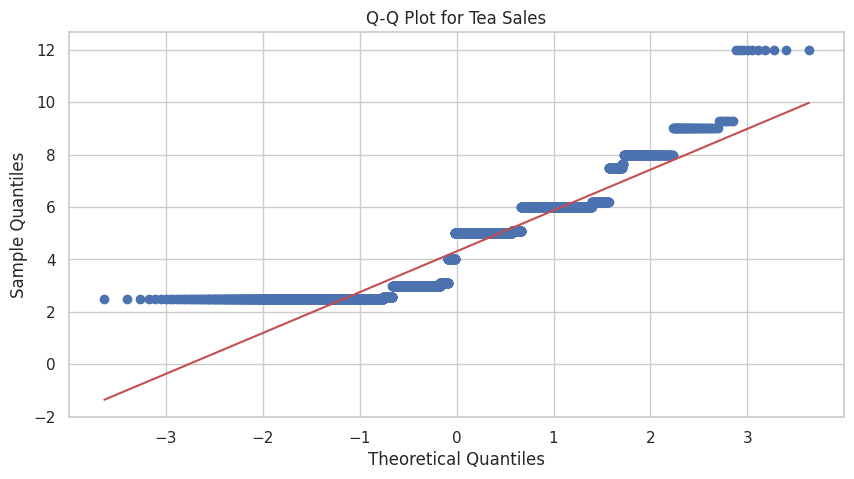

In [46]:
plot_qqnorm(tea_sales, 'Q-Q Plot for Tea Sales')

In [48]:
_, p_value_tea = stats.shapiro(tea_sales)

if p_value_tea > alpha:
    print('The Null Hypothesis (H0) for Tea is not rejected: the data appear to come from a normal distribution')
else:
    print('The Null Hypothesis (H0) is rejected for Tea: the data do not appear to come from a normal distribution')

The Null Hypothesis (H0) is rejected for Tea: the data do not appear to come from a normal distribution


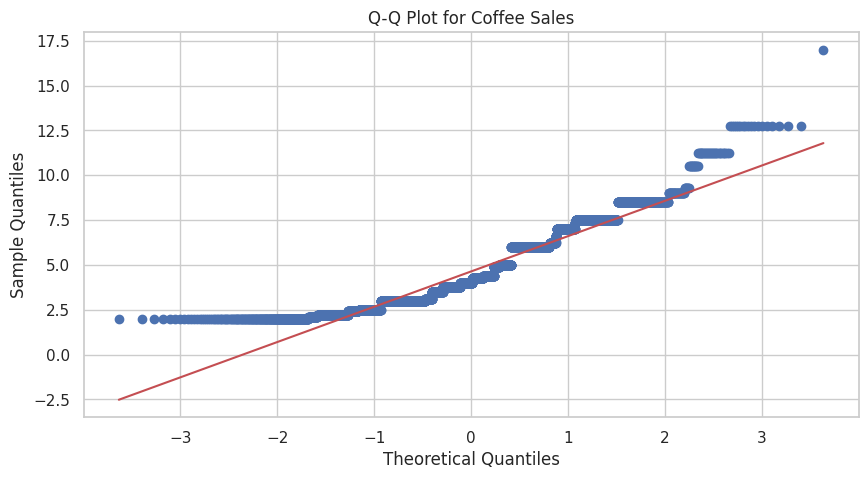

In [47]:
plot_qqnorm(coffee_sales, 'Q-Q Plot for Coffee Sales')

In [49]:
_, p_value_coffee = stats.shapiro(coffee_sales)

if p_value_coffee > alpha:
    print('The Null Hypothesis (H0) for Coffee is not rejected: the data appears to come from a normal distribution')
else:
    print('The Null Hypothesis (H0) is rejected for Coffee: the data does not appear to come from a normal distribution')

The Null Hypothesis (H0) is rejected for Coffee: the data does not appear to come from a normal distribution


### Levene's Test for Homogeneity of Variances

- **Null Hypothesis (H0)**: The samples have the same variance.
- **Alternative Hypothesis (H1)**: The samples have different variances.

In [50]:
_, p_value_levene = stats.levene(tea_sales, coffee_sales)

if p_value_levene > alpha:
    print('The Null Hypothesis (H0) for Tea is not rejected: the samples have the same variance')
else:
    print('The Null Hypothesis (H0) is rejected for Tea: the samples have different variances')

The Null Hypothesis (H0) is rejected for Tea: the samples have different variances


### Parametric: Student's T-Test

- Normality of Distributions [N]
- Homogeneity of Variances [N]
- Independence of Observations [Y]


In [51]:
# _, p_value_tt = stats.ttest_ind(tea_sales, coffee_sales)

# if p_value_tt > alpha:
#     print('There is not enough evidence to reject the null hypothesis: The average sales of Tea and Coffee are equal')
# else:
#     print('There is sufficient evidence to reject the null hypothesis: The average sales of Tea and Coffee are different')

### Nonparametric: Mann–Whitney U Test

In [52]:
tea_sales = df[df['product_category'] == 'Tea']['total_bill']#.sample(5000)
coffee_sales = df[df['product_category'] == 'Coffee']['total_bill']#.sample(5000)

In [53]:
statistic, p_value_mw = stats.mannwhitneyu(tea_sales, coffee_sales, alternative='two-sided')

if p_value_mw > alpha:
    print('There is not enough evidence to reject the null hypothesis: The average sales of Tea and Coffee are equal')
else:
    print('There is sufficient evidence to reject the null hypothesis: The average sales of Tea and Coffee are different')

There is sufficient evidence to reject the null hypothesis: The average sales of Tea and Coffee are different


In [54]:
asym_sales = df['total_bill'].skew()

print(round(asym_sales,2))

41.75
